In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Define the ticker symbol and the timeframe
ticker_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-07-01"

# Retrieve historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [9]:
# Calculate the 50-day and 200-day moving averages
data["SMA_50"] = data["Close"].rolling(window=50).mean()
data["SMA_200"] = data["Close"].rolling(window=200).mean()

In [10]:
# Define the trading signals
data["Signal"] = 0
data["Signal"][50:] = (
    data["SMA_50"][50:] > data["SMA_200"][50:]
).astype(int)

# Calculate the position changes
data["Position"] = data["Signal"].diff()

C:\Users\len\AppData\Local\Temp\ipykernel_51304\3901168131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Signal"][50:] = (


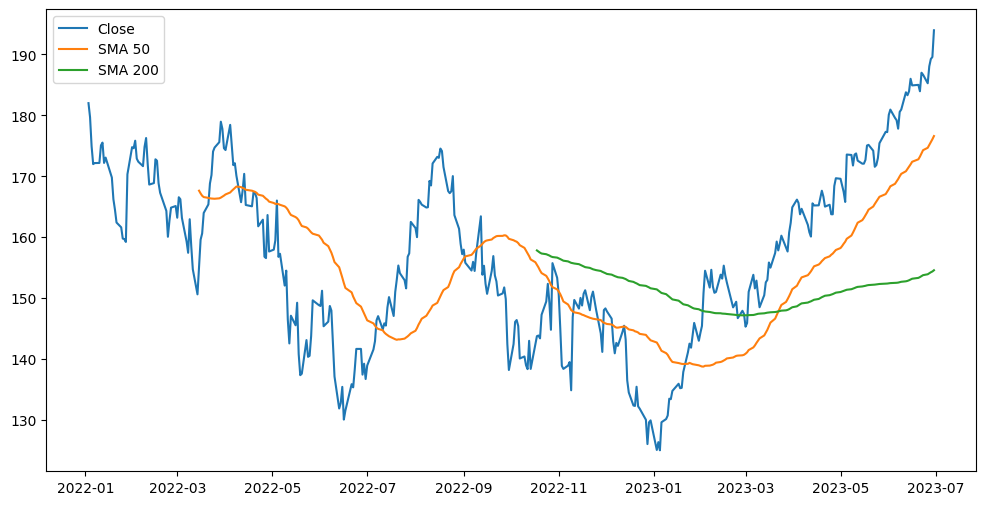

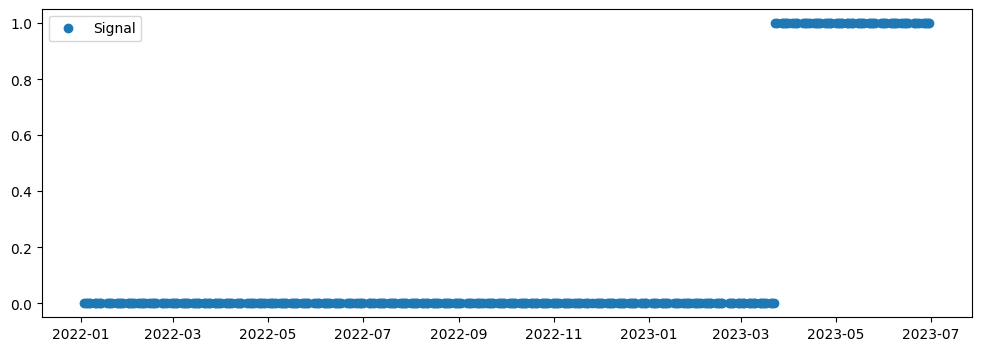

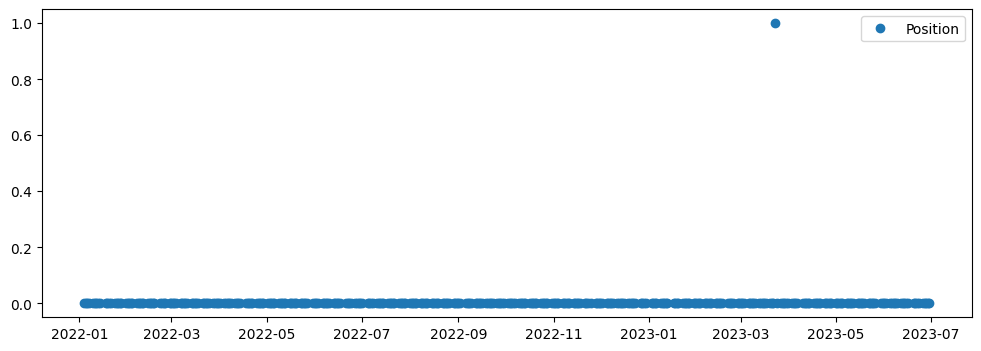

In [11]:
# Plot the closing price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data["Close"], label="Close")
plt.plot(data["SMA_50"], label="SMA 50")
plt.plot(data["SMA_200"], label="SMA 200")
plt.legend()

# Plot the trading signals
plt.figure(figsize=(12, 4))
plt.plot(data["Signal"], label="Signal", marker="o", linestyle="")
plt.legend()

# Plot the position changes
plt.figure(figsize=(12, 4))
plt.plot(data["Position"], label="Position", marker="o", linestyle="")
plt.legend()

plt.show()